## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.562587  0.925174  1.337135 -0.223371 -1.555071  0.778316
1 -1.567040  1.742719  0.237691  1.059664  1.518626  0.123474
2  0.088330 -0.006263  0.712549 -0.338728  1.332885  0.430637
3 -1.642962  0.386122 -0.305373  1.353525  1.544820  0.031550
4 -0.468097 -0.175681 -1.515364 -1.049101 -1.028576 -0.643919


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0053386	total: 62.9ms	remaining: 1m 2s
1:	learn: 0.9969998	total: 63.5ms	remaining: 31.7s
2:	learn: 0.9868884	total: 64.1ms	remaining: 21.3s
3:	learn: 0.9756099	total: 64.6ms	remaining: 16.1s
4:	learn: 0.9657319	total: 65.2ms	remaining: 13s
5:	learn: 0.9557545	total: 65.6ms	remaining: 10.9s
6:	learn: 0.9453383	total: 66.2ms	remaining: 9.39s
7:	learn: 0.9357835	total: 66.6ms	remaining: 8.26s
8:	learn: 0.9269033	total: 67.1ms	remaining: 7.39s
9:	learn: 0.9194195	total: 67.6ms	remaining: 6.69s
10:	learn: 0.9088333	total: 68.1ms	remaining: 6.12s
11:	learn: 0.8992119	total: 68.5ms	remaining: 5.64s
12:	learn: 0.8908070	total: 69.2ms	remaining: 5.25s
13:	learn: 0.8829345	total: 69.7ms	remaining: 4.91s
14:	learn: 0.8750942	total: 70.2ms	remaining: 4.61s
15:	learn: 0.8674121	total: 70.8ms	remaining: 4.35s
16:	learn: 0.8593253	total: 71.3ms	remaining: 4.12s
17:	learn: 0.8519493	total: 71.8ms	remaining: 3.91s
18:	learn: 0.8452249	total: 72.3ms	remaining: 

77:	learn: 0.4989138	total: 99.9ms	remaining: 1.18s
78:	learn: 0.4944613	total: 100ms	remaining: 1.17s
79:	learn: 0.4916681	total: 101ms	remaining: 1.16s
80:	learn: 0.4871612	total: 101ms	remaining: 1.15s
81:	learn: 0.4834552	total: 102ms	remaining: 1.14s
82:	learn: 0.4789020	total: 102ms	remaining: 1.13s
83:	learn: 0.4747900	total: 103ms	remaining: 1.12s
84:	learn: 0.4701681	total: 103ms	remaining: 1.11s
85:	learn: 0.4662329	total: 104ms	remaining: 1.1s
86:	learn: 0.4626080	total: 104ms	remaining: 1.09s
87:	learn: 0.4586279	total: 105ms	remaining: 1.09s
88:	learn: 0.4546788	total: 106ms	remaining: 1.08s
89:	learn: 0.4511704	total: 106ms	remaining: 1.07s
90:	learn: 0.4474678	total: 106ms	remaining: 1.06s
91:	learn: 0.4439680	total: 107ms	remaining: 1.05s
92:	learn: 0.4405093	total: 107ms	remaining: 1.05s
93:	learn: 0.4363284	total: 108ms	remaining: 1.04s
94:	learn: 0.4325128	total: 108ms	remaining: 1.03s
95:	learn: 0.4288679	total: 109ms	remaining: 1.02s
96:	learn: 0.4256294	total: 109

232:	learn: 0.1592703	total: 188ms	remaining: 619ms
233:	learn: 0.1582003	total: 189ms	remaining: 618ms
234:	learn: 0.1571440	total: 189ms	remaining: 617ms
235:	learn: 0.1561759	total: 190ms	remaining: 615ms
236:	learn: 0.1551788	total: 190ms	remaining: 613ms
237:	learn: 0.1540988	total: 191ms	remaining: 611ms
238:	learn: 0.1527348	total: 191ms	remaining: 610ms
239:	learn: 0.1516738	total: 192ms	remaining: 608ms
240:	learn: 0.1504088	total: 193ms	remaining: 607ms
241:	learn: 0.1494529	total: 193ms	remaining: 605ms
242:	learn: 0.1483368	total: 194ms	remaining: 604ms
243:	learn: 0.1473099	total: 195ms	remaining: 603ms
244:	learn: 0.1464839	total: 195ms	remaining: 601ms
245:	learn: 0.1455621	total: 196ms	remaining: 600ms
246:	learn: 0.1446638	total: 196ms	remaining: 597ms
247:	learn: 0.1437556	total: 196ms	remaining: 596ms
248:	learn: 0.1426121	total: 197ms	remaining: 594ms
249:	learn: 0.1417247	total: 197ms	remaining: 592ms
250:	learn: 0.1405370	total: 198ms	remaining: 591ms
251:	learn: 

404:	learn: 0.0589929	total: 285ms	remaining: 418ms
405:	learn: 0.0585961	total: 285ms	remaining: 417ms
406:	learn: 0.0582066	total: 286ms	remaining: 416ms
407:	learn: 0.0577840	total: 286ms	remaining: 415ms
408:	learn: 0.0574078	total: 287ms	remaining: 414ms
409:	learn: 0.0569999	total: 287ms	remaining: 413ms
410:	learn: 0.0566034	total: 288ms	remaining: 412ms
411:	learn: 0.0564730	total: 288ms	remaining: 411ms
412:	learn: 0.0563768	total: 288ms	remaining: 410ms
413:	learn: 0.0560177	total: 289ms	remaining: 409ms
414:	learn: 0.0556646	total: 290ms	remaining: 408ms
415:	learn: 0.0552806	total: 290ms	remaining: 407ms
416:	learn: 0.0549067	total: 290ms	remaining: 406ms
417:	learn: 0.0545289	total: 291ms	remaining: 405ms
418:	learn: 0.0544067	total: 291ms	remaining: 404ms
419:	learn: 0.0540486	total: 292ms	remaining: 403ms
420:	learn: 0.0536832	total: 293ms	remaining: 402ms
421:	learn: 0.0534872	total: 293ms	remaining: 401ms
422:	learn: 0.0531313	total: 294ms	remaining: 400ms
423:	learn: 

574:	learn: 0.0268579	total: 372ms	remaining: 275ms
575:	learn: 0.0266798	total: 373ms	remaining: 274ms
576:	learn: 0.0265794	total: 373ms	remaining: 274ms
577:	learn: 0.0263963	total: 374ms	remaining: 273ms
578:	learn: 0.0262729	total: 374ms	remaining: 272ms
579:	learn: 0.0261747	total: 375ms	remaining: 271ms
580:	learn: 0.0260516	total: 375ms	remaining: 271ms
581:	learn: 0.0259553	total: 376ms	remaining: 270ms
582:	learn: 0.0258337	total: 376ms	remaining: 269ms
583:	learn: 0.0257147	total: 377ms	remaining: 268ms
584:	learn: 0.0255982	total: 377ms	remaining: 268ms
585:	learn: 0.0255002	total: 377ms	remaining: 267ms
586:	learn: 0.0254047	total: 378ms	remaining: 266ms
587:	learn: 0.0253117	total: 378ms	remaining: 265ms
588:	learn: 0.0252210	total: 379ms	remaining: 264ms
589:	learn: 0.0251327	total: 379ms	remaining: 264ms
590:	learn: 0.0250466	total: 380ms	remaining: 263ms
591:	learn: 0.0249810	total: 380ms	remaining: 262ms
592:	learn: 0.0249168	total: 381ms	remaining: 261ms
593:	learn: 

763:	learn: 0.0120585	total: 470ms	remaining: 145ms
764:	learn: 0.0120169	total: 470ms	remaining: 144ms
765:	learn: 0.0119745	total: 471ms	remaining: 144ms
766:	learn: 0.0119288	total: 471ms	remaining: 143ms
767:	learn: 0.0118778	total: 472ms	remaining: 143ms
768:	learn: 0.0118459	total: 472ms	remaining: 142ms
769:	learn: 0.0118087	total: 473ms	remaining: 141ms
770:	learn: 0.0117592	total: 473ms	remaining: 141ms
771:	learn: 0.0117280	total: 473ms	remaining: 140ms
772:	learn: 0.0116973	total: 474ms	remaining: 139ms
773:	learn: 0.0116609	total: 475ms	remaining: 139ms
774:	learn: 0.0116130	total: 475ms	remaining: 138ms
775:	learn: 0.0115829	total: 475ms	remaining: 137ms
776:	learn: 0.0115533	total: 476ms	remaining: 137ms
777:	learn: 0.0115051	total: 476ms	remaining: 136ms
778:	learn: 0.0114703	total: 477ms	remaining: 135ms
779:	learn: 0.0114412	total: 477ms	remaining: 135ms
780:	learn: 0.0114052	total: 478ms	remaining: 134ms
781:	learn: 0.0113599	total: 478ms	remaining: 133ms
782:	learn: 

942:	learn: 0.0064488	total: 557ms	remaining: 33.7ms
943:	learn: 0.0064375	total: 557ms	remaining: 33.1ms
944:	learn: 0.0064096	total: 558ms	remaining: 32.5ms
945:	learn: 0.0063841	total: 558ms	remaining: 31.9ms
946:	learn: 0.0063569	total: 559ms	remaining: 31.3ms
947:	learn: 0.0063362	total: 559ms	remaining: 30.7ms
948:	learn: 0.0063246	total: 560ms	remaining: 30.1ms
949:	learn: 0.0063075	total: 560ms	remaining: 29.5ms
950:	learn: 0.0062833	total: 561ms	remaining: 28.9ms
951:	learn: 0.0062720	total: 561ms	remaining: 28.3ms
952:	learn: 0.0062397	total: 562ms	remaining: 27.7ms
953:	learn: 0.0062152	total: 562ms	remaining: 27.1ms
954:	learn: 0.0061892	total: 563ms	remaining: 26.5ms
955:	learn: 0.0061579	total: 563ms	remaining: 25.9ms
956:	learn: 0.0061324	total: 564ms	remaining: 25.3ms
957:	learn: 0.0061212	total: 564ms	remaining: 24.7ms
958:	learn: 0.0061040	total: 565ms	remaining: 24.1ms
959:	learn: 0.0060785	total: 565ms	remaining: 23.6ms
960:	learn: 0.0060676	total: 566ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

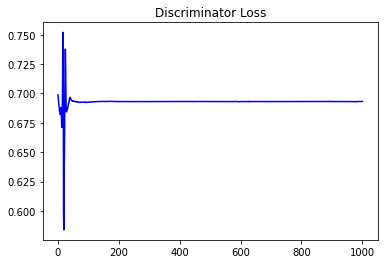

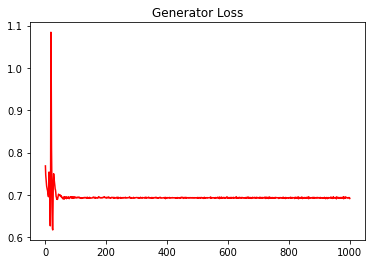

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1251411656524477


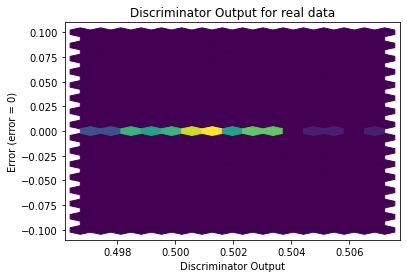

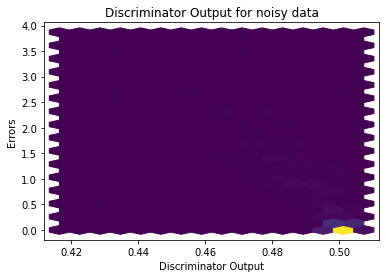

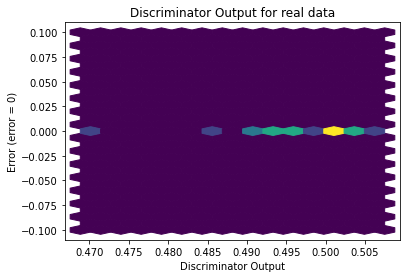

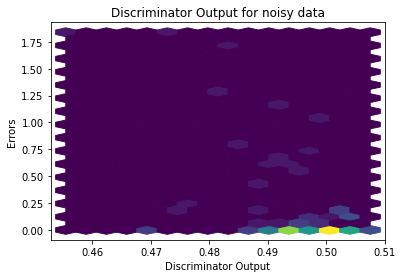

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


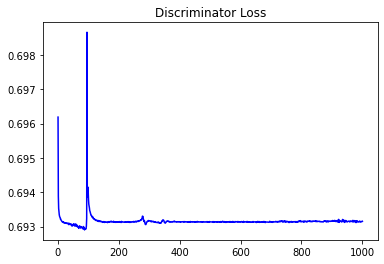

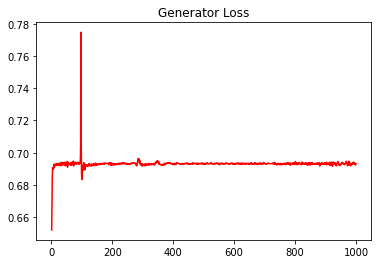

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13311373259328893


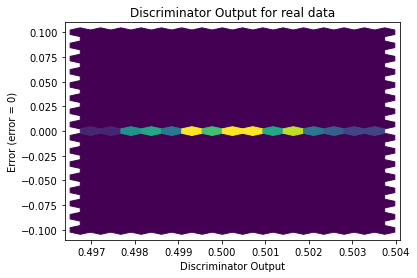

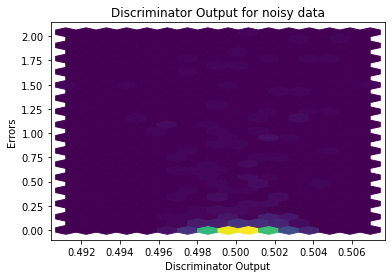

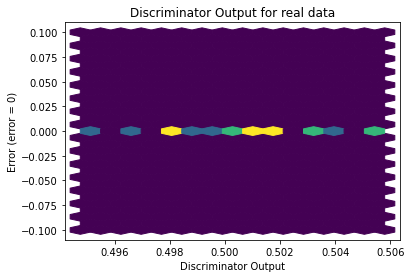

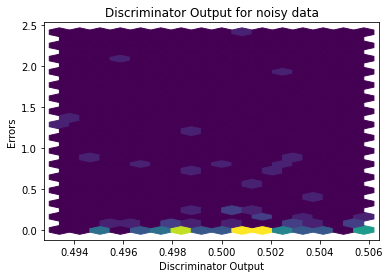

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0029]], requires_grad=True)
